# **AdWise:Predicting Product Sales from Ad Investment**

## **Content**

1.   Introduction
2.   Importing Libraries
3.   Data Preparation

     3.1. Load the Dataset

     3.2. Exploratory Data Analysis (EDA)
4.   Feature Engineering
   
     4.1. Train-Test Split

5.   Model Development

     5.1.  Train Models

6.   Model Validation

     6.1. Evaluate Model Performance

     6.2. Cross-Validation
7.   Visualization

     7.1. Residual Analysis

     7.2. Feature Importance

8.   Dashboard


## **1. Introduction**

Imagine a busy market where businesses shout to get customers’ attention, waving ads like bright signs on TV, radio and newspapers. Every dollar spent is a seed but which ones grow into sales? The "AdWise: Predicting Product Sales from Ad Investment" project jumps in like a clever gardener, figuring out what works.

AdWise uses a dataset of ad costs for TV, Radio and Newspapers plus sales numbers. With cool charts, like 3D scatter plots and colorful heatmaps we spot trends showing how ads boost sales. Smart predictions help businesses spend their ad money better. This project turns data into a clear plan, helping companies grow profits and win in a tough market.

Let's Grow Smart, Sell Big with AdWise Insights!

## **2. Importing Libraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **3. Data Preparation**

###**3.1Load the Dataset**


In [34]:
df = pd.read_csv("/content/advertising.csv")

###**3.2. Exploratory Data Analysis (EDA)**

**Analyze the dataset structure**

In [35]:
df.shape

(200, 4)

In [36]:
df.size

800

In [37]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [39]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Check missing values**

In [40]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


**Statistical Analysis**

In [41]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


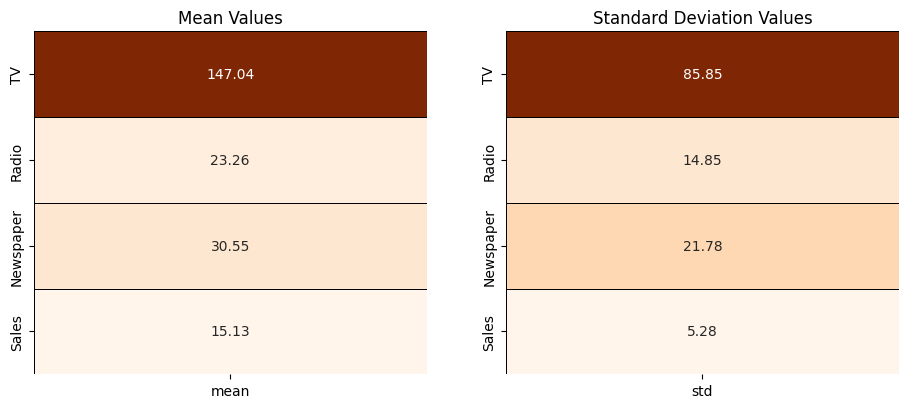

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# Plotting Mean Values
plt.subplot(1, 2, 1)
sns.heatmap(df.describe().T[['mean']], cmap='Oranges', annot=True, fmt='.2f', linecolor='black', linewidths=0.4, cbar=False)
plt.title('Mean Values')
# Plotting Standard Deviation Values
plt.subplot(1, 2, 2)
sns.heatmap(df.describe().T[['std']], cmap='Oranges', annot=True, fmt='.2f', linecolor='black', linewidths=0.4, cbar=False)
plt.title('Standard Deviation Values')
fig.tight_layout(pad = 4)
plt.show()

**Visualize key relationships**

**3D Interactive Scatter Plot**

In [43]:
import plotly.express as px
fig = px.scatter_3d(df, x='TV', y='Radio', z='Newspaper', color='Sales', size='Sales',
                    hover_data=['TV', 'Radio', 'Newspaper', 'Sales'],
                    color_continuous_scale='Jet', opacity=0.7)
fig.update_layout(scene=dict(xaxis_title='TV ($)', yaxis_title='Radio ($)', zaxis_title='Newspaper ($)'),
                  title='3D Scatter Plot of Advertising Costs vs Sales',
                  template='plotly_dark')
fig.show()

**Correlation Heatmap with Annotations**

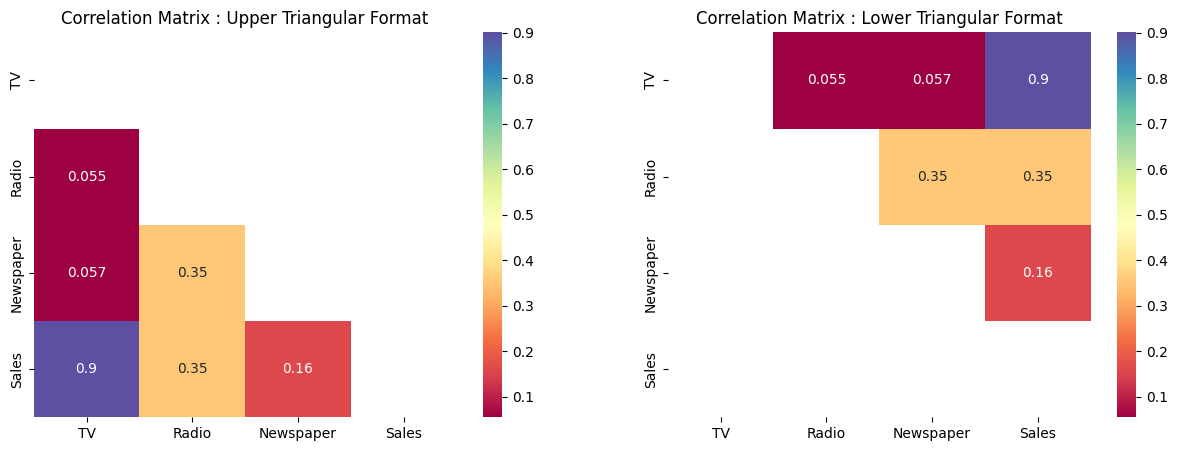

In [44]:
upper_t = np.triu(df.corr())
lower_t = np.tril(df.corr())
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df.corr(),cmap = 'Spectral',annot = True,cbar = 'True',mask = upper_t);
plt.title('Correlation Matrix : Upper Triangular Format');
plt.subplot(1,2,2)
sns.heatmap(df.corr(),cmap = 'Spectral',annot = True,cbar = 'True',mask = lower_t );
plt.title('Correlation Matrix : Lower Triangular Format');

**Bubble Plot**

In [45]:
import plotly.express as px
import pandas as pd
fig = px.scatter(df, x='TV', y='Radio', size='Sales', color='Newspaper',
                 hover_data=['TV', 'Radio', 'Newspaper', 'Sales'],
                 color_continuous_scale='Hot', opacity=0.6,
                 size_max=50)
fig.update_layout(title='Bubble Plot: TV vs Radio with Sales (Size) and Newspaper (Color)',
                  xaxis_title='TV ($)', yaxis_title='Radio ($)',
                  template='plotly_dark')
fig.show()

**Hexbin Plot with Marginal Distributions**

<Figure size 1000x800 with 0 Axes>

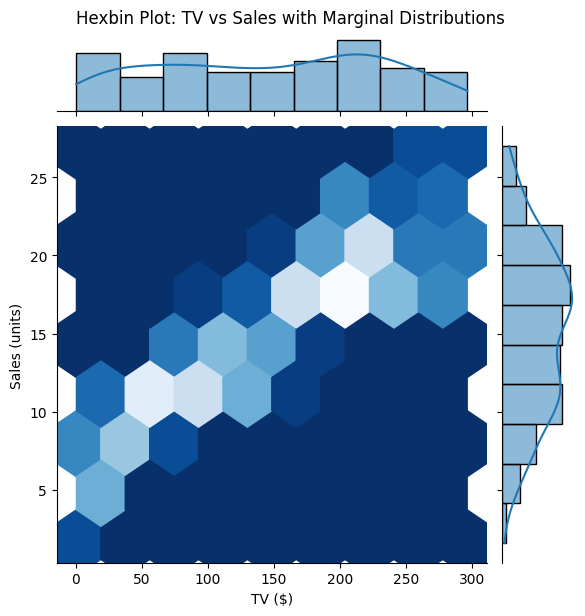

In [46]:
plt.figure(figsize=(10, 8))
g = sns.jointplot(data=df, x='TV', y='Sales', kind='hex',
                  cmap='Blues_r', marginal_kws=dict(kde=True, fill=True))
g.set_axis_labels('TV ($)', 'Sales (units)')
g.fig.suptitle('Hexbin Plot: TV vs Sales with Marginal Distributions', y=1.02)
plt.show()

<Figure size 1000x800 with 0 Axes>

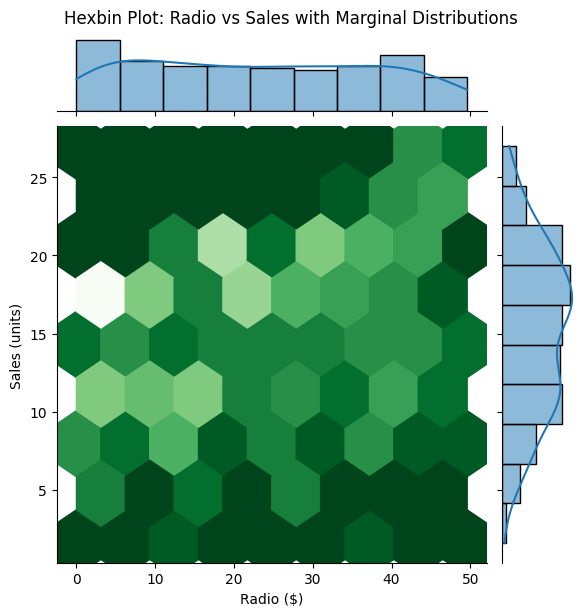

In [47]:
plt.figure(figsize=(10, 8))
g = sns.jointplot(data=df, x='Radio', y='Sales', kind='hex',
                  cmap='Greens_r', marginal_kws=dict(kde=True, fill=True))
g.set_axis_labels('Radio ($)', 'Sales (units)')
g.fig.suptitle('Hexbin Plot: Radio vs Sales with Marginal Distributions', y=1.02)
plt.show()

<Figure size 1000x800 with 0 Axes>

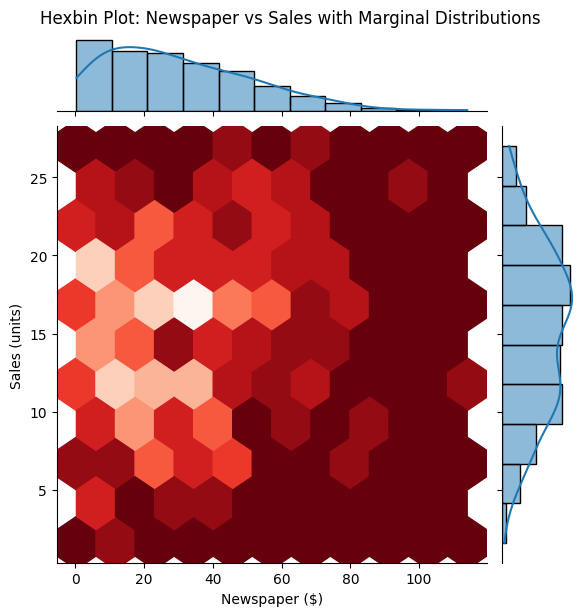

In [48]:
plt.figure(figsize=(10, 8))
g = sns.jointplot(data=df, x='Newspaper', y='Sales', kind='hex',
                  cmap='Reds_r', marginal_kws=dict(kde=True, fill=True))
g.set_axis_labels('Newspaper ($)', 'Sales (units)')
g.fig.suptitle('Hexbin Plot: Newspaper vs Sales with Marginal Distributions', y=1.02)
plt.show()

##**4. Feature Engineering**

**Train-Test Split**

In [49]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=["Sales"])
y = df["Sales"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

##**5. Model Development**

**Linear Regression**

In [50]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr= lr.predict(x_test)

**Decision Tree Regressor**

In [51]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

**Random Forest Regressor**

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train, y_train)
y_pred_rf= rf.predict(x_test)

##**6.Model Validation**

**Evaluate Model Performance**

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
results = []
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Model': model_name,
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'R² Score': round(r2, 4)})
# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

results_df = pd.DataFrame(results)
print(results_df)

                     Model   MAE   MSE  R² Score
0        Linear Regression  1.27  2.91    0.9059
1  Decision Tree Regressor  1.24  3.40    0.8899
2  Random Forest Regressor  0.92  1.44    0.9535


**Cross-Validation**

In [54]:
from sklearn.model_selection import cross_val_score
models = {
    "Linear Regression": lr,
    "Decision Tree Regressor": dt,
    "Random Forest Regressor": rf}
cv_results = []
# Perform 5-fold cross-validation using R² score
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    cv_results.append({
        "Model": name,
        "Mean R² Score": round(scores.mean(), 4),
        "Std Dev": round(scores.std(), 4) })
cv_df = pd.DataFrame(cv_results)
print(cv_df)

                     Model  Mean R² Score  Std Dev
0        Linear Regression         0.8954   0.0314
1  Decision Tree Regressor         0.9058   0.0200
2  Random Forest Regressor         0.9417   0.0211


##**7.Visualization**

**Plot residuals for the best-performing model**

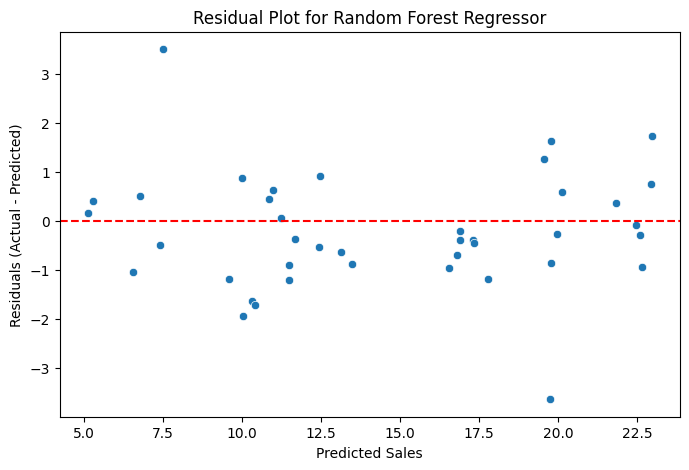

In [55]:
y_pred_rf = rf.predict(x_test)
residuals = y_test - y_pred_rf
# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Random Forest Regressor')
plt.show()

**Feature Importance**

In [56]:
importances = rf.feature_importances_
feature_names = x_train.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feat_imp_df)

     Feature  Importance
0         TV    0.845355
1      Radio    0.136642
2  Newspaper    0.018003


In [57]:
import plotly.graph_objects as go
feat_imp_df = pd.DataFrame({
    'Feature': ['TV', 'Radio', 'Newspaper'],
    'Importance': [0.845355, 0.136642, 0.018003]})
fig = go.Figure(go.Bar(
    x=feat_imp_df['Importance'],
    y=feat_imp_df['Feature'],
    orientation='h',
    text=[f"{val:.4f}" for val in feat_imp_df['Importance']],
    textposition='outside',
    marker=dict(
        color=feat_imp_df['Importance'],
        colorscale='Tealgrn',
        line=dict(color='darkblue', width=1)),
    hovertemplate='<b>%{y}</b><br>Importance: %{x:.4f}<extra></extra>',))
fig.update_layout(
    title='🔥 Feature Importance - Random Forest',
    xaxis_title='Importance Score',
    yaxis_title='Features',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(248, 248, 255, 1)',
    font=dict(family='Arial', size=14, color='black'),
    height=450)
fig.show()

##**8.Dashboard**

In [58]:
import joblib
joblib.dump(rf, 'rf.pkl')

['rf.pkl']

In [59]:
!pip install dash pandas scikit-learn joblib
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd
import joblib
# Load trained model
model = joblib.load('rf.pkl')
# Initialize Dash app
app = dash.Dash(__name__)
# Layout
app.layout = html.Div([
    html.Div([
        html.H1("📊 Sales Prediction", style={
            'textAlign': 'center',
            'color': '#2E7D32',
            'marginBottom': '30px',
            'fontFamily': 'Arial' }),
        html.Div([
            dcc.Input(id='TV', type='number', placeholder='TV Advertising ($)', required=True,
                      style={'margin': '10px', 'padding': '12px', 'width': '300px',
                             'borderRadius': '8px', 'border': '1px solid #ccc'}),
            dcc.Input(id='Radio', type='number', placeholder='Radio Advertising ($)', required=True,
                      style={'margin': '10px', 'padding': '12px', 'width': '300px',
                             'borderRadius': '8px', 'border': '1px solid #ccc'}),
            dcc.Input(id='Newspaper', type='number', placeholder='Newspaper Advertising ($)', required=True,
                      style={'margin': '10px', 'padding': '12px', 'width': '300px',
                             'borderRadius': '8px', 'border': '1px solid #ccc'}),
            html.Br(),
            html.Button('Predict Sales', id='predict_button', n_clicks=0,
                        style={'marginTop': '20px', 'padding': '12px 30px', 'backgroundColor': '#2E7D32',
                               'color': 'white', 'border': 'none', 'borderRadius': '8px',
                               'fontWeight': 'bold', 'fontSize': '16px', 'boxShadow': '2px 2px 6px #ccc'}),
        ], style={'textAlign': 'center'}),

        html.Div(id='prediction_output', style={
            'textAlign': 'center',
            'fontSize': '22px',
            'marginTop': '30px',
            'color': '#2E7D32',
            'fontWeight': 'bold'
        })
    ], style={
        'width': '60%',
        'margin': 'auto',
        'backgroundColor': 'white',
        'padding': '40px',
        'borderRadius': '15px',
        'boxShadow': '0 4px 12px rgba(0, 0, 0, 0.1)'
    })
], style={
    'backgroundColor': '#f4f4f4',
    'minHeight': '100vh',
    'paddingTop': '60px',
    'fontFamily': 'Arial, sans-serif'
})

# Callback for sales prediction
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('TV', 'value'), State('Radio', 'value'), State('Newspaper', 'value')]
)
def update_output(n_clicks, tv, radio, newspaper):
    if n_clicks > 0:
        if None in (tv, radio, newspaper):
            return '⚠️ Please enter all advertising values.'
        features = pd.DataFrame([[tv, radio, newspaper]], columns=['TV', 'Radio', 'Newspaper'])
        prediction = model.predict(features)[0]
        return f'📈 Predicted Sales: {prediction:.2f} units'
    return ''

# Run app
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>